In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = yf.download('TSLA')

[*********************100%***********************]  1 of 1 completed


In [13]:
data['returns'] =  np.log(data['Adj Close']/data['Adj Close'].shift(1))
data['volatility'] = data['returns'].rolling(window=22).std()
data.head()

,Open,High,Low,Close,Adj Close,Volume,returns,volatility
Date,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-0.002515,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.081723,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.134312,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.175470,NaN


Text(0.5, 1.0, 'TSLA Monthly Volatility')

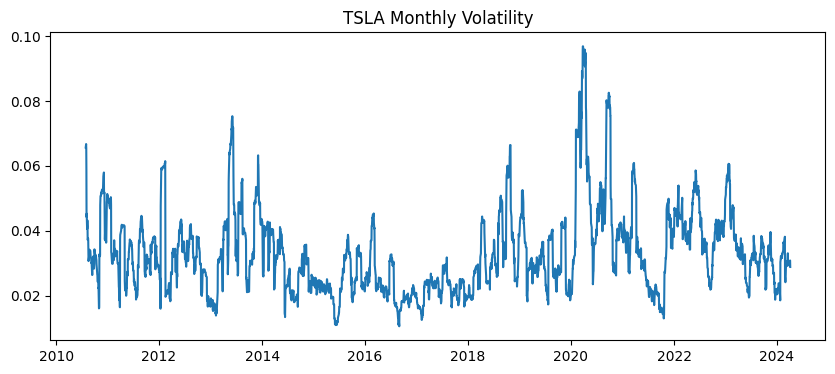

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(data['volatility'])
plt.title("TSLA Monthly Volatility")